In [1]:
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from tensorflow import keras
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

#numpy配列を省略しないようにする
np.set_printoptions(threshold=np.inf)
#pandasを省略しないようにする
pd.set_option('display.max_columns', 500) # 列
pd.set_option('display.max_rows', 500)  # 行

mm = preprocessing.MinMaxScaler()  # 正規化エンコード、デコード

In [2]:
# 正規化関数
def mmscaler(data):
    mm = preprocessing.MinMaxScaler()  # 正規化エンコード、デコード
    dat = mm.fit_transform(data)
    return dat

# 目的変数の作成関数 1:df 2:目的変数のカラム名称 3:shiftさせるカラム名称 4:shiftする数
def shift(df, t_name, t_column, shift):
    df[t_name] = df[t_column].shift(shift) # 1行上にずらして5分後の値にしている
    df[t_name+'_diff'] = df[t_name] - df[t_column]
    return df

# トレーニングデータの作成
def create_data(read_dir, save_dir):
    df = pd.read_csv(read_dir, encoding='shift_jis')
    #カラムを削除
    df = df.dropna()  # NaNを削除
    #df.drop(labels='日付(ローソク足)', axis=1, inplace=True) # ろうそく足データの日付
    
    df['time'] = pd.to_datetime(df['time']  )#, format='%Y-%m-%d-%A %H:%M:%S')  # 日付カラムを日付型に変換
    df['time(hour)'] = df['time'].dt.hour  # hourをデータに追加
    df['time(minute)'] = df['time'].dt.minute  # minuteをデータに追加
    df['time(weekday)'] = df['time'].dt.dayofweek  # minuteをデータに追加
    # df['日付']カラムが [datetime64[ns]]型になっていて扱いづらいので最後に削除する
    #df.drop(labels='日付', axis=1, inplace=True)
    
    date = df['time'] # 代入して変数を避難させる
    
    shift(df, 'y_rate_1h', 'close', -1)  # 目的変数の作成関数
    shift(df, 'y_rate_2h', 'close', -2)  # 目的変数の作成関数
    shift(df, 'y_rate_3h', 'close', -3)  # 目的変数の作成関数
    shift(df, 'y_rate_4h', 'close', -4)  # 目的変数の作成関数
    shift(df, 'y_rate_5h', 'close', -5)  # 目的変数の作成関数
    shift(df, 'y_rate_6h', 'close', -6)  # 目的変数の作成関数
    shift(df, 'y_rate_7h', 'close', -7)  # 目的変数の作成関数
    shift(df, 'y_rate_8h', 'close', -8)  # 目的変数の作成関数
    shift(df, 'y_rate_9h', 'close', -9)  # 目的変数の作成関数
    shift(df, 'y_rate_10h', 'close', -10)  # 目的変数の作成関数
    shift(df, 'y_rate_11h', 'close', -11)  # 目的変数の作成関数
    shift(df, 'y_rate_12h', 'close', -12)  # 目的変数の作成関数
    shift(df, 'y_rate_13h', 'close', -13)  # 目的変数の作成関数
    shift(df, 'y_rate_14h', 'close', -14)  # 目的変数の作成関数
    shift(df, 'y_rate_15h', 'close', -15)  # 目的変数の作成関数
    shift(df, 'y_rate_16h', 'close', -16)  # 目的変数の作成関数
    shift(df, 'y_rate_17h', 'close', -17)  # 目的変数の作成関数
    shift(df, 'y_rate_18h', 'close', -18)  # 目的変数の作成関数
    shift(df, 'y_rate_19h', 'close', -19)  # 目的変数の作成関数
    shift(df, 'y_rate_20h', 'close', -20)  # 目的変数の作成関数
    shift(df, 'y_rate_21h', 'close', -21)  # 目的変数の作成関数
    shift(df, 'y_rate_22h', 'close', -22)  # 目的変数の作成関数
    shift(df, 'y_rate_23h', 'close', -23)  # 目的変数の作成関数
    shift(df, 'y_rate_24h', 'close', -24)  # 目的変数の作成関数

    
    df = df.dropna()  # NaNを削除

    return df

# 入力したインプットデータを正規化、形状を整える関数
def create_traindata(df, X_train, y_train):

    print('入力数:', X_train.columns)
    row_count = len(y_train)  # 行数を取得(形状の作成に使用)
    column_count = len(X_train.columns)  # 列数を取得(形状の作成に使用)
    
    print('行数:', row_count)
    print('列数:', column_count)
    print('整形前の形状(特徴量):', X_train.shape)
    X_train = mm.fit_transform(X_train)  # 正規化
    pickle.dump(mm, open('./dump/X_train_scaler_diff.sav', 'wb'))
 #   X_train = np.array(X_train).reshape(row_count, column_count, -1)  # 特徴量の形状(3次元)
 #   y_train = np.array(y_train).reshape(row_count,1)  # 特徴量の形状
    y_train = y_train.to_frame()
    y_train = mm.fit_transform(y_train)  # 正規化
    pickle.dump(mm, open('./dump/y_train_scaler_diff.sav', 'wb'))

    print('形状(特徴量):', X_train.shape)
    print('形状(目的変数):', y_train.shape)
    return X_train, y_train


# 予測関数
def predict(model_dir, param_dir,X_train, y_train):
    model = keras.models.load_model(model_dir)  # モデルを読込み
    model.load_weights(param_dir)  # 重みを読込み
    
    y_pred_one = model(X_train[-2:-1])  # 最終行の予測
    y_pred = model(X_train)
    y_pred_one = mm.inverse_transform(y_pred_one)  # 予測結果の正規化をデコード
    y_pred = mm.inverse_transform(y_pred)  # 予測結果の正規化をデコード
    y_train = mm.inverse_transform(y_train)  # 実際の結果の正規化をデコード
    return y_pred_one, y_pred, y_train

# プロット関数
def plot_result(y_pred, y_train, title):
    flg = plt.figure()
    fig = plt.figure(figsize=(6, 4), dpi=72, linewidth=10)
    ax = fig.add_subplot(111, xlabel='number', ylabel='price',title=title)  # グラフ作成
    
    ax.plot(y_train, label='actual')  # 実測
    ax.plot(y_pred, label='predict')  # 予測
    
    plt.legend()
    


In [3]:
# モデル作成関数
def model_create():
    #n_inputs = len(X_train.columns)  # 入力数
    model = keras.models.Sequential()
   # model.add(keras.layers.Dense(1200, activation='sigmoid'))
    model.add(keras.layers.Dense(12, activation='linear'))
    model.add(keras.layers.Dense(6, activation='linear'))
   # model.add(keras.layers.LSTM(1, activation='linear',
   #               recurrent_activation='sigmoid',
   #               kernel_initializer='glorot_normal',
   #                recurrent_initializer='orthogonal',
   #                            batch_input_shape=(None, n_inputs, 1)))
    #model.add(keras.layers.Dense(1200, activation='linear'))
    #model.add(keras.layers.Dense(100, activation='linear'))
    #model.add(keras.layers.Dense(50, activation='linear'))
    #model.add(keras.layers.Dense(7, activation='linear'))
    model.add(keras.layers.Dense(1, activation='linear'))
    
    optimizer = keras.optimizers.Adam(lr=0.07)  # オプティマイザ
    loss_fn = keras.losses.mse  # 損失関数
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mae'])  # コンパイル
    #model.summary()
    return model

# モデルの学習関数
def learn_model(X_train, y_train, model_name, param_name, epochs):
    model = model_create()  # モデル作成
    
    tensorboard = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
    earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')
    cp_cb = keras.callbacks.ModelCheckpoint(filepath=param_name, monitor='val_mae', verbose=1, save_best_only=True, mode='auto')
    #on_train_end = lambda logs.
    
    # 学習 LSTM_GBPJPY
    print('モデルの学習を開始します')
    history_model = model.fit(X_train, y_train, batch_size=1,epochs=epochs,validation_split=0.03,
                                                  callbacks=[
                                                 # tensorboard,
                                                  earlystopping,
                                                      cp_cb
                                                  ])
    
    model.save(model_name)  # モデルを保存
    # model.save_weights(param_name)  # 重みを保存
    return model

# 学習関数
def learn(df, X_train, y_rate, title, epochs, model_dir, param_dir):
    #**********1時間後予測**********学習のinput情報(特徴量、答え)
    y_train = df.loc[:, y_rate]  # 全行 , 最終列
    X_train, y_train = create_traindata(df, X_train, y_train)  # 入力したインプットデータをdropna、正規化、形状を整える
    model = learn_model(X_train, y_train, model_dir, param_dir, epochs)  # モデルの学習
    y_pred_one, y_pred, y_train = predict(model_dir, param_dir, X_train, y_train) # 保存したモデルから予測
    plot_result(y_pred, y_train, title)  # プロット
    return y_pred_one, y_pred

In [4]:
# 変数宣言
read_dir = "./FX_GBPJPY, 60.csv"
save_dir =  "./Intermediate/after_ratediff.csv"


after = -1 # shift関数のスライド数 (1行上にずらして-分後の値にしている)
name = '4h'
t_column = 'close'  # 目的変数のカラム
t_name = 'y_rate_5m'

# ***************************************トレーニングデータの作成***************************************
df = create_data(read_dir, save_dir)
df.to_csv("./Intermediate/中間ファイル.csv", encoding='shift_jis', index=False)
# ***************************************トレーニングデータの作成***************************************

# X_trainデータ作成
df = df.dropna()  # Nanを削除
X_train = df.loc[:, 'open':'time(weekday)']  # 全行 , 列名称(始まり):列名称(終わり)
n_inputs = len(X_train.columns)  # 入力数
#X_train[-2:-1]


epochs = 40

In [5]:
"""廃止
# n時間後の時刻とレートを計算してdfに反映関数
def UNIX_RATE_conversion(df, time, name):
    # UNIX時間に変更
    df['日付UNIX'] = pd.to_datetime(df['日付']).dt.tz_localize('Asia/Tokyo')
    df['日付UNIX'] = df['日付UNIX'].astype('int64') // 10**9
    
    df['日付UNIX' + name] = df['日付UNIX'].shift(time) # 1行上にずらして5分後の値にしている
    df['日付UNIX_計算後' + name] = df['日付UNIX' + name] - df['日付UNIX'] # -分後の値か表した変数
    df['RATE' + name] = df['bid_close'].shift(time)

    return df  # n分後のUNIX時間、レートの計算結果を反映している

"""



"廃止\n# n時間後の時刻とレートを計算してdfに反映関数\ndef UNIX_RATE_conversion(df, time, name):\n    # UNIX時間に変更\n    df['日付UNIX'] = pd.to_datetime(df['日付']).dt.tz_localize('Asia/Tokyo')\n    df['日付UNIX'] = df['日付UNIX'].astype('int64') // 10**9\n    \n    df['日付UNIX' + name] = df['日付UNIX'].shift(time) # 1行上にずらして5分後の値にしている\n    df['日付UNIX_計算後' + name] = df['日付UNIX' + name] - df['日付UNIX'] # -分後の値か表した変数\n    df['RATE' + name] = df['bid_close'].shift(time)\n\n    return df  # n分後のUNIX時間、レートの計算結果を反映している\n\n"

入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 575us/step - loss: 0.1006 - mae: 0.1410 - val_loss: 0.0018 - val_mae: 0.0330

Epoch 00001: val_mae improved from inf to 0.03301, saving model to ./model/GBPJPY_1h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 468us/step - loss: 0.0056 - mae: 0.0559 - val_loss: 0.0060 - val_mae: 0.0681

Epoch 00002: val_mae did not improve from 0.03301
Epoch 3/40
1264/1264 [==============================] - 1s 514us/step - loss: 3.8121 - mae: 0.3850 - val_loss: 0.0066 - val_mae: 0.0679

Epoch 00003: val_mae did not improve from 0.03301
Epoch 4/40
1264/1264 [=

<Figure size 432x288 with 0 Axes>

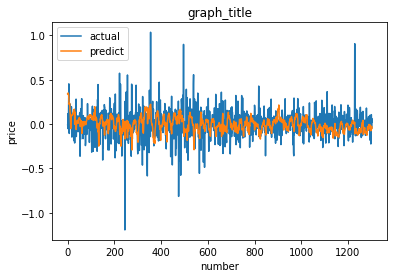

In [14]:

graph_title = '1h'
y_pred_1h, y_pred = learn(df, X_train, 'y_rate_1h_diff', 'graph_title', epochs, './model/GBPJPY_1h_diff/model.hdf5','./model/GBPJPY_1h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 565us/step - loss: 0.1438 - mae: 0.1890 - val_loss: 0.0033 - val_mae: 0.0415

Epoch 00001: val_mae improved from inf to 0.04154, saving model to ./model/GBPJPY_4h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 487us/step - loss: 0.0139 - mae: 0.0905 - val_loss: 0.0401 - val_mae: 0.1912

Epoch 00002: val_mae did not improve from 0.04154
Epoch 3/40
1264/1264 [==============================] - 1s 474us/step - loss: 0.3896 - mae: 0.1533 - val_loss: 0.0059 - val_mae: 0.0606

Epoch 00003: val_mae did not improve from 0.04154
Epoch 4/40
1264/1264 [=

<Figure size 432x288 with 0 Axes>

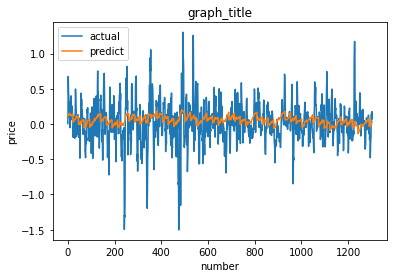

In [7]:

graph_title = '4h'
y_pred_4h, y_pred = learn(df, X_train, 'y_rate_4h_diff', 'graph_title', epochs, './model/GBPJPY_4h_diff/model.hdf5','./model/GBPJPY_4h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 537us/step - loss: 0.0554 - mae: 0.1560 - val_loss: 0.0112 - val_mae: 0.0870

Epoch 00001: val_mae improved from inf to 0.08700, saving model to ./model/GBPJPY_8h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 458us/step - loss: 2.9206 - mae: 0.3980 - val_loss: 0.0058 - val_mae: 0.0689

Epoch 00002: val_mae improved from 0.08700 to 0.06890, saving model to ./model/GBPJPY_8h_diff\param.hdf5
Epoch 3/40
1264/1264 [==============================] - 1s 487us/step - loss: 0.0262 - mae: 0.1236 - val_loss: 0.0056 - val_mae: 0.0650

Epoch 00003: val_m

<Figure size 432x288 with 0 Axes>

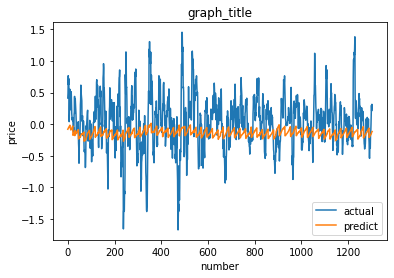

In [8]:

graph_title = '8h'
y_pred_8h, y_pred = learn(df, X_train, 'y_rate_8h_diff', 'graph_title', epochs, './model/GBPJPY_8h_diff/model.hdf5','./model/GBPJPY_8h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 600us/step - loss: 0.1480 - mae: 0.1833 - val_loss: 0.0047 - val_mae: 0.0601

Epoch 00001: val_mae improved from inf to 0.06007, saving model to ./model/GBPJPY_12h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 471us/step - loss: 0.0194 - mae: 0.1061 - val_loss: 0.0093 - val_mae: 0.0823

Epoch 00002: val_mae did not improve from 0.06007
Epoch 3/40
1264/1264 [==============================] - 1s 472us/step - loss: 0.2011 - mae: 0.1497 - val_loss: 0.0031 - val_mae: 0.0475

Epoch 00003: val_mae improved from 0.06007 to 0.04751, saving model to .

<Figure size 432x288 with 0 Axes>

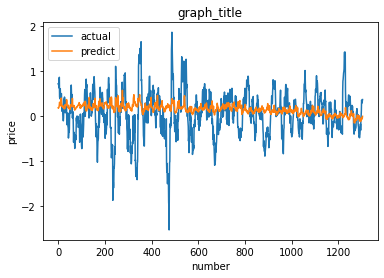

In [9]:

graph_title = '12h'
y_pred_12h, y_pred = learn(df, X_train, 'y_rate_12h_diff', 'graph_title', epochs, './model/GBPJPY_12h_diff/model.hdf5','./model/GBPJPY_12h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 551us/step - loss: 0.0898 - mae: 0.1708 - val_loss: 0.0057 - val_mae: 0.0670

Epoch 00001: val_mae improved from inf to 0.06699, saving model to ./model/GBPJPY_16h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 513us/step - loss: 0.9594 - mae: 0.2402 - val_loss: 0.0041 - val_mae: 0.0565

Epoch 00002: val_mae improved from 0.06699 to 0.05653, saving model to ./model/GBPJPY_16h_diff\param.hdf5
Epoch 3/40
1264/1264 [==============================] - 1s 491us/step - loss: 0.0247 - mae: 0.1233 - val_loss: 0.0113 - val_mae: 0.0931

Epoch 00003: val

<Figure size 432x288 with 0 Axes>

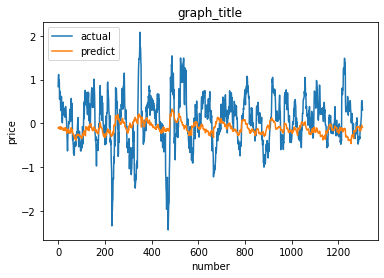

In [10]:

graph_title = '16h'
y_pred_16h, y_pred = learn(df, X_train, 'y_rate_16h_diff', 'graph_title', epochs, './model/GBPJPY_16h_diff/model.hdf5','./model/GBPJPY_16h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 585us/step - loss: 0.0598 - mae: 0.1642 - val_loss: 0.0258 - val_mae: 0.1498

Epoch 00001: val_mae improved from inf to 0.14984, saving model to ./model/GBPJPY_20h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 508us/step - loss: 4.5208 - mae: 0.6893 - val_loss: 0.0392 - val_mae: 0.1728

Epoch 00002: val_mae did not improve from 0.14984
Epoch 3/40
1264/1264 [==============================] - 1s 471us/step - loss: 0.0340 - mae: 0.1404 - val_loss: 0.0544 - val_mae: 0.2210

Epoch 00003: val_mae did not improve from 0.14984
Epoch 4/40
1264/1264 [

<Figure size 432x288 with 0 Axes>

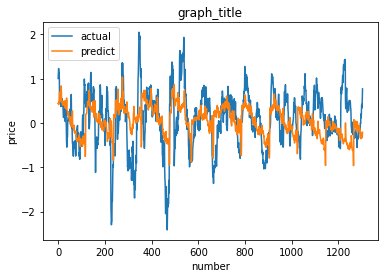

In [11]:

graph_title = '20h'
y_pred_20h, y_pred = learn(df, X_train, 'y_rate_20h_diff', 'graph_title', epochs, './model/GBPJPY_20h_diff/model.hdf5','./model/GBPJPY_20h_diff/param.hdf5') # 学習関数


入力数: Index(['open', 'high', 'low', 'close', 'Developing Poc', 'Developing VA High',
       'Developing VA Low', 'Volume', 'Volume MA', 'RSI', 'Plot', 'Plot.1',
       'Oscillator', 'ATR', 'CCI', 'time(hour)', 'time(minute)',
       'time(weekday)'],
      dtype='object')
行数: 1304
列数: 18
整形前の形状(特徴量): (1304, 18)
形状(特徴量): (1304, 18)
形状(目的変数): (1304, 1)
モデルの学習を開始します
Epoch 1/40
1264/1264 [==============================] - 1s 617us/step - loss: 0.3067 - mae: 0.2433 - val_loss: 0.0093 - val_mae: 0.0689

Epoch 00001: val_mae improved from inf to 0.06892, saving model to ./model/GBPJPY_24h_diff\param.hdf5
Epoch 2/40
1264/1264 [==============================] - 1s 488us/step - loss: 0.0240 - mae: 0.1191 - val_loss: 0.0097 - val_mae: 0.0905

Epoch 00002: val_mae did not improve from 0.06892
Epoch 3/40
1264/1264 [==============================] - 1s 455us/step - loss: 0.0247 - mae: 0.1234 - val_loss: 0.8693 - val_mae: 0.9028

Epoch 00003: val_mae did not improve from 0.06892
Epoch 4/40
1264/1264 [

<Figure size 432x288 with 0 Axes>

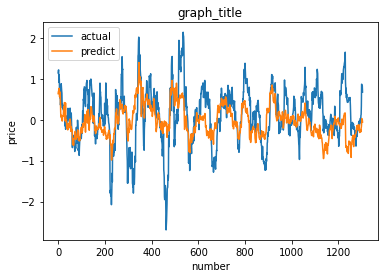

In [12]:

graph_title = '24h'
y_pred_24h, y_pred = learn(df, X_train, 'y_rate_24h_diff', 'graph_title', epochs, './model/GBPJPY_24h_diff/model.hdf5','./model/GBPJPY_24h_diff/param.hdf5') # 学習関数


In [13]:
#plot_list = np.concatenate([y_pred_1h, y_pred_2h, y_pred_3h, y_pred_4h, y_pred_5h, y_pred_6h, y_pred_7h, y_pred_8h
                           , y_pred_9h, y_pred_10h, y_pred_11h, y_pred_12h, y_pred_13h, y_pred_14h, y_pred_15h, y_pred_16h
                           , y_pred_17h, y_pred_18h, y_pred_19h, y_pred_20h, y_pred_21h, y_pred_22h, y_pred_23h, y_pred_24h])# 5m, 1h, 4h, 8h, 1dの予測リスト

def plot_pred(plot_list):
    flg = plt.figure()
    fig = plt.figure(figsize=(6, 4), dpi=72, linewidth=10)
    ax = fig.add_subplot(111, xlabel='number', ylabel='price',title='title')  # グラフ作成
    
    ax.plot(plot_list, label='actual')  # 5m, 1h, 4h, 8h, 1dの予測リスト
   # ax.plot(y_pred, label='predict')  # 予測
    plt.legend()

#plot_pred(plot_list)
#print(plot_list)

IndentationError: unexpected indent (<ipython-input-13-5b48d2b2c74f>, line 2)

In [ ]:
#tensorboard --logdir='./logs'